## Index
1. [Importing Essential Libraries](#libraries)
2. [Data Summarization](#data_summarization)
3. [Exploratory Data Analysis](#eda)
4. [Data Preparation](#dataprep)
5. [Hypertuning of Parameters](#hypertune)




<hr>

## Dataset Source

Dataset is obtained from [here](https://www.kaggle.com/datasets/csafrit2/predicting-divorce?resource=download)

<hr>

<a id='libraries'></a>
## 1. Importing Essential Libraries

*Import libraries needed for data preparation, visualisation and modelling*

In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.ticker as ticker
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns
import scipy.stats as stats

def suppress_warnings():
    import warnings
    warnings.filterwarnings('ignore')
    if not sys.warnoptions:
        warnings.simplefilter("ignore")
    warnings.filterwarnings('ignore', category=DeprecationWarning)
    warnings.filterwarnings('ignore', category=FutureWarning)
suppress_warnings()

*Import libraries needed for Machine Learning*

In [3]:
from sklearn import tree, linear_model, neighbors, naive_bayes, ensemble, model_selection, gaussian_process, datasets, preprocessing, discriminant_analysis
from sklearn import svm  #support vector Machine
from sklearn.tree import DecisionTreeClassifier  #Decision Tree
from sklearn.linear_model import LogisticRegression  #logistic regression
from sklearn.neighbors import KNeighborsClassifier  #KNN
from sklearn.naive_bayes import GaussianNB  #Naive bayes
import xgboost as xgb
from xgboost import XGBClassifier #XGBoost
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn.ensemble import RandomForestClassifier, VotingClassifier  #Random Forest, Ensemble VotingClassifier
from sklearn.model_selection import train_test_split  #training and testing data split
from sklearn.model_selection import KFold  #for K-fold cross validation
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn import metrics  #accuracy measure
from sklearn.metrics import confusion_matrix  #for confusion matrix
from sklearn.metrics import roc_curve, auc #for roc curve
from scipy.stats import skew
from scipy.stats.stats import pearsonr
suppress_warnings()

<a id='data_summarization'></a>
## 2. Data Summarization


### 2.1 Statistical Summaries & Visualizations

In [4]:
df = pd.read_csv("divorce.csv")
df.head(5)

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Sorry_end                      170 non-null    int64
 1   Ignore_diff                    170 non-null    int64
 2   begin_correct                  170 non-null    int64
 3   Contact                        170 non-null    int64
 4   Special_time                   170 non-null    int64
 5   No_home_time                   170 non-null    int64
 6   2_strangers                    170 non-null    int64
 7   enjoy_holiday                  170 non-null    int64
 8   enjoy_travel                   170 non-null    int64
 9   common_goals                   170 non-null    int64
 10  harmony                        170 non-null    int64
 11  freeom_value                   170 non-null    int64
 12  entertain                      170 non-null    int64
 13  people_goals        

In [6]:
df.describe()

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


Removed data: idk_what's_going_on, good_to_leave_home, I'm_not_wrong, Contact(vague), enjoy_travel, roles

In [22]:
df_arguments = df[['Aggro_argue','Always_never','negative_personality','offensive_expressions','insult','humiliate','not_calm','hate_subjects'
                   ,'sudden_discussion','calm_breaks','argue_then_leave',"I'm_right",'accusations','no_hesitancy_inadequate','Divorce_Y_N']]

df_arguments.shape

(170, 15)

In [21]:
df_behaviour = df[['Sorry_end','Ignore_diff','begin_correct','likes','care_sick','silent_for_calm','silence_instead_of_discussion','silence_for_harm',
                   'silence_fear_anger','Divorce_Y_N']]

df_behaviour.shape

(170, 10)

In [20]:
df_qualitytime = df[['Special_time','No_home_time','2_strangers','enjoy_holiday','harmony','entertain','Divorce_Y_N']]

df_qualitytime.shape

(170, 7)

In [23]:
df_ambition = df[['common_goals','freeom_value','people_goals','dreams','love','happy','marriage'
                  ,'trust','Divorce_Y_N']]

df_ambition.shape

(170, 9)

### 2.2 Correlation Matrix

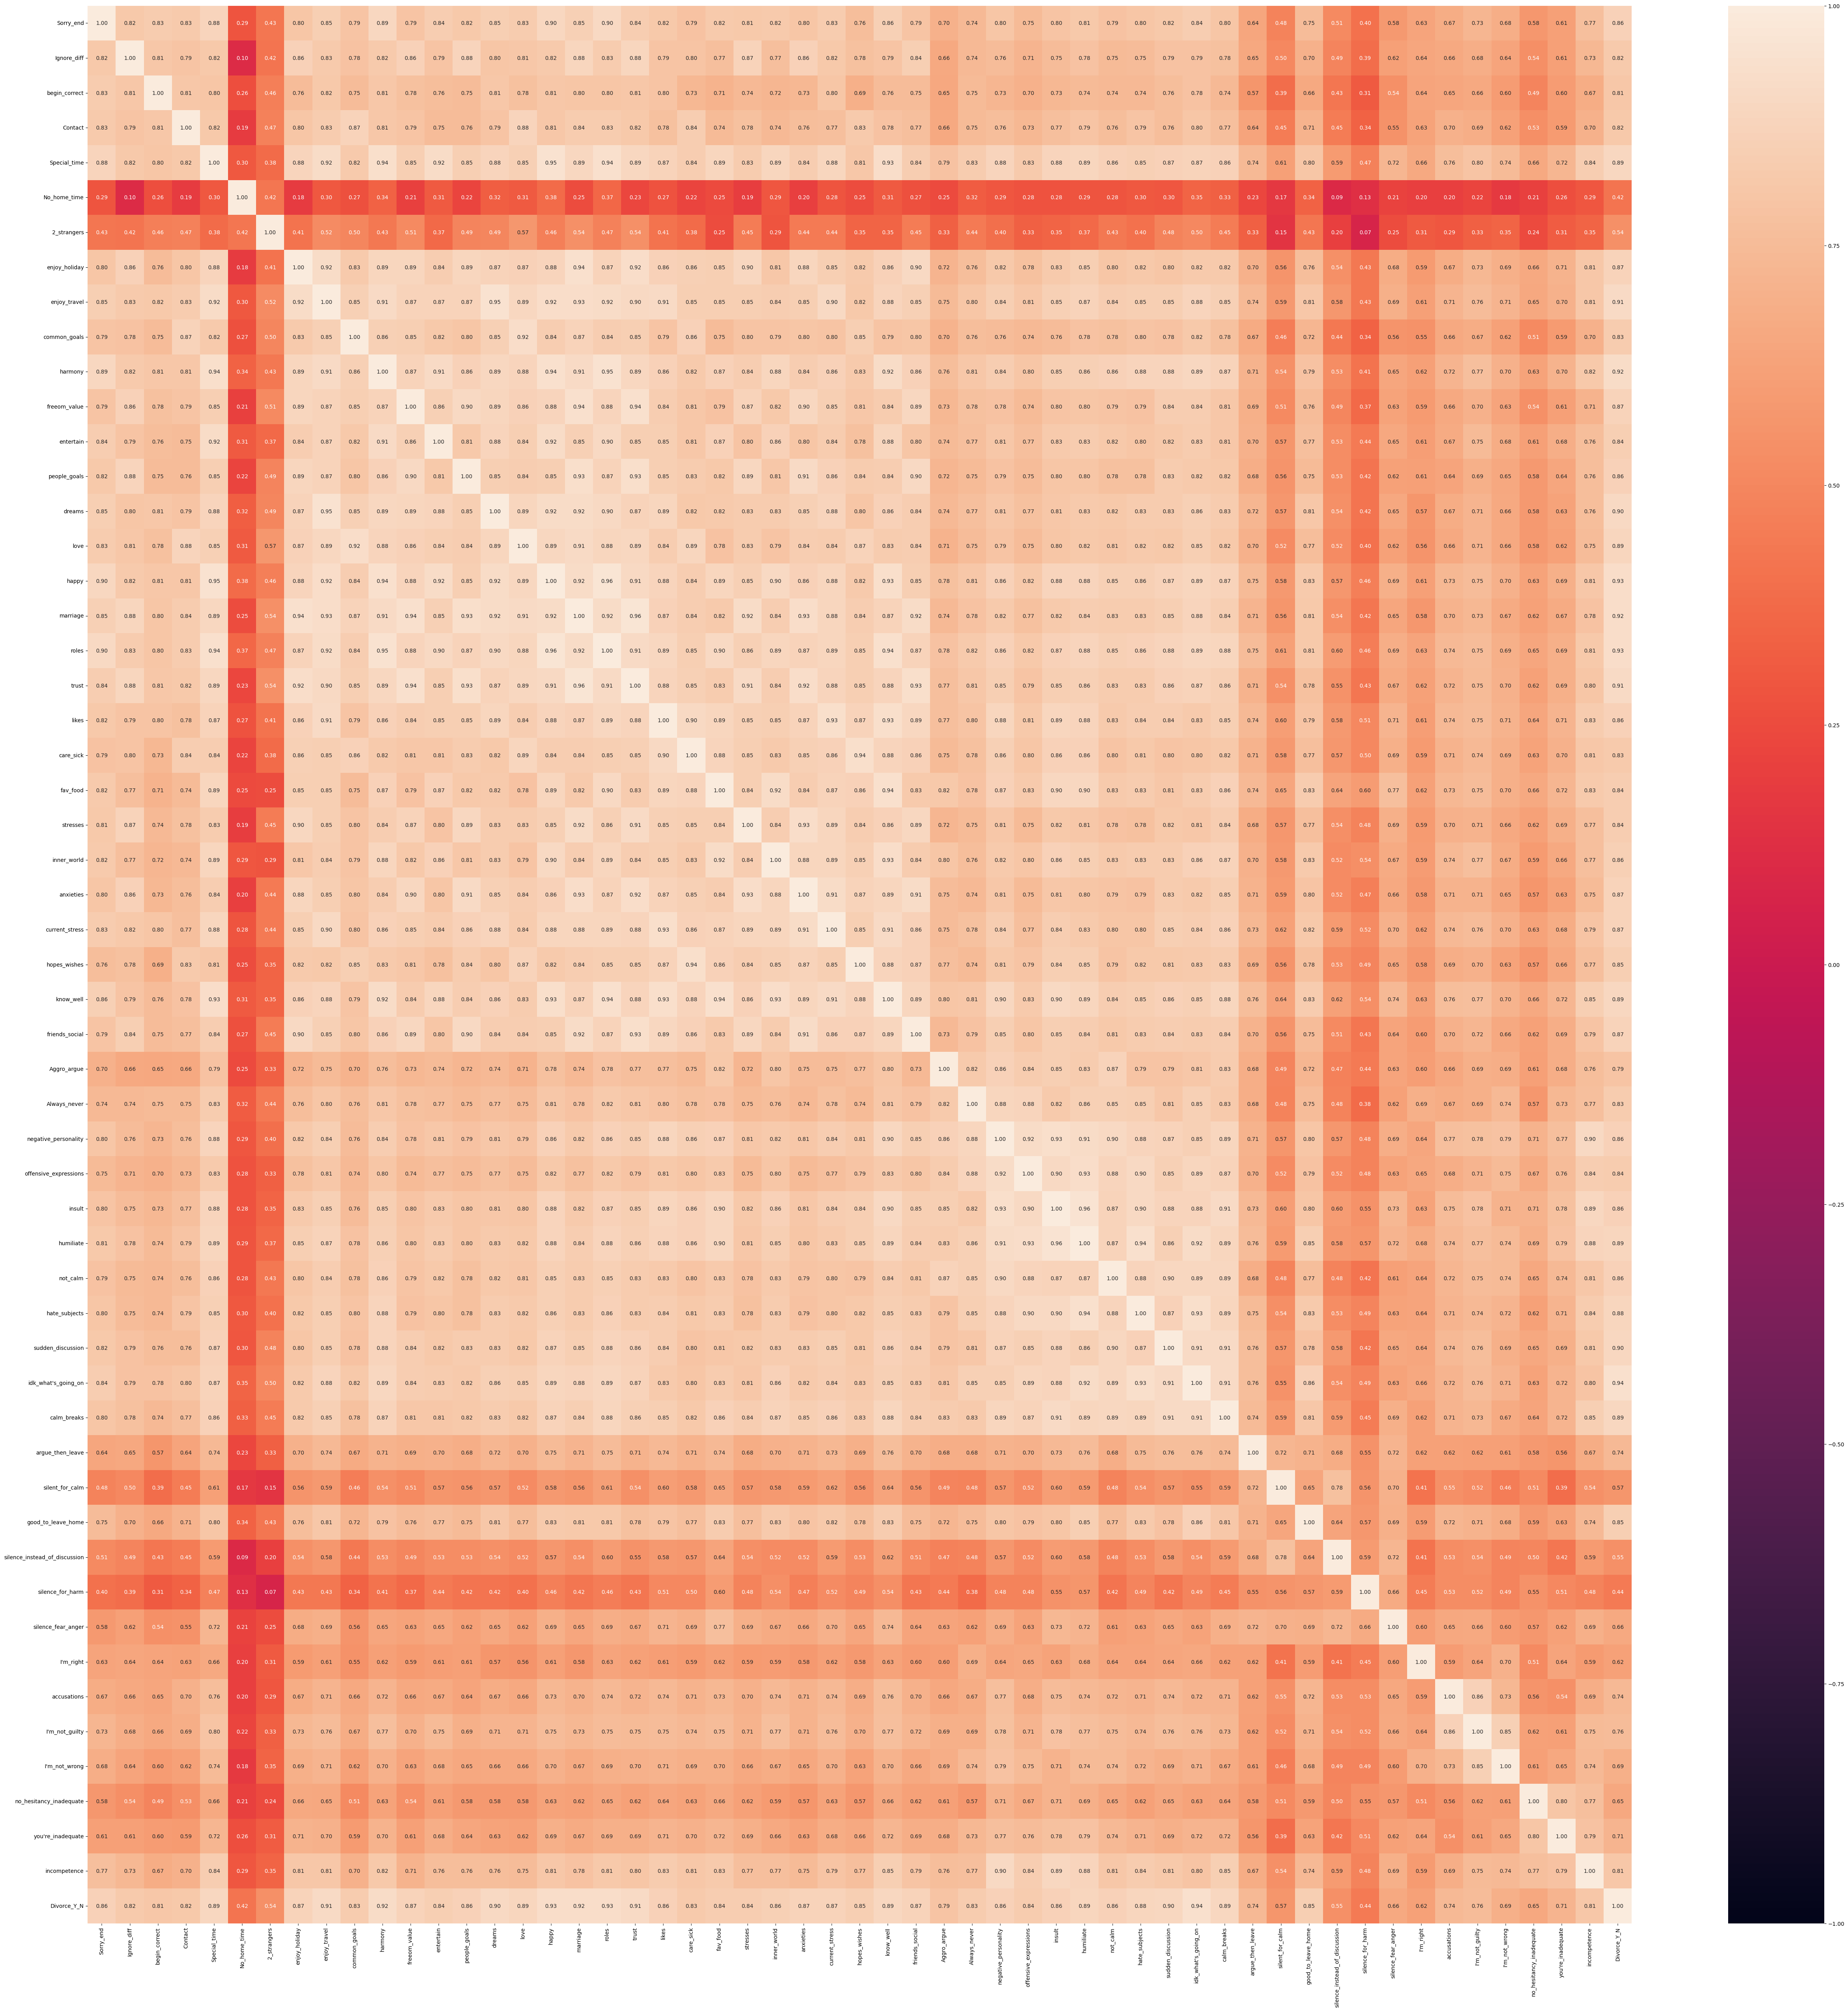

In [9]:
figure = plt.figure(figsize=(64,64))
sns.heatmap(df.corr(),annot=True,fmt='.2f',vmin=-1, vmax=1)
plt.show()

<a id='eda'></a>
## 3. Exploratory Data Analysis

<a id='dataprep'></a>
## 4. Data Preparation

<a id='hypertune'></a>
## 5. Hypertuning of Parameters